# Problématique

Quels sont les facteurs cliniques les plus prédictifs du diabète chez les femmes (ce dataset concerne des femmes) et peut-on construire un modèle fiable pour prédire le risque de diabète ?

# Hypothèse :

Le niveau de glucose, l'IMC (BMI), l'âge et le nombre de grossesses (Pregnancies) sont les facteurs les plus significativement corrélés avec l'apparition du diabète.

In [32]:
# Importation des librairies nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
import sqlite3

# Chargement des données :

In [95]:
pip install ydata-profiling

In [3]:
import warnings
warnings.filterwarnings('ignore')

from ydata_profiling import ProfileReport

In [12]:
df = pd.read_csv('/content/diabetes.csv')

In [10]:
import pandas as pd

file_path = "dataset_covid19.csv"

# Encodage avec ISO-8859-1
df = pd.read_csv(file_path, encoding="ISO-8859-1")


In [13]:
profile = ProfileReport(df,explorative=True,title='diabetes EXPLORATIVE DATA ANALYSIS')  #creating a report
profile.to_file("diabetes.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 9/9 [00:00<00:00, 74.46it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Exploration et préparation des données

In [96]:
# Afficher les premières lignes
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [15]:
# Afficher la taille du dataset
df.shape

(768, 9)

In [17]:
# Afficher des informations sur les colonnes
print("\nInformations sur les colonnes:")
df.info()


Informations sur les colonnes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [18]:
# Statistiques descriptives
print("\nStatistiques descriptives:")
df.describe(include='all')


Statistiques descriptives:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [27]:
# Identifier les valeurs manquantes (représentées par des 0 dans ce dataset)
print("\nValeurs nulles ou zero problématiques:")
for col in df.columns:
    print(f"{col}: {(df[col] == 0).sum()} zeros")



Valeurs nulles ou zero problématiques:
Pregnancies: 111 zeros
Glucose: 5 zeros
BloodPressure: 35 zeros
SkinThickness: 227 zeros
Insulin: 374 zeros
BMI: 11 zeros
DiabetesPedigreeFunction: 0 zeros
Age: 0 zeros
Outcome: 500 zeros


In [28]:
# Colonnes où 0 n'a pas de sens biologique
cols_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [29]:
# Remplacer les 0 par NaN puis par la médiane
for col in cols_to_clean:
    df[col] = df[col].replace(0, np.nan)
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

In [30]:
# Vérifier le dataset aprés le nettoyage
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [26]:
# Identifier les doublons dans le jeu de données
df.duplicated().sum()

np.int64(0)

# Analyse Exploratoire (EDA)

- Analyse univariée

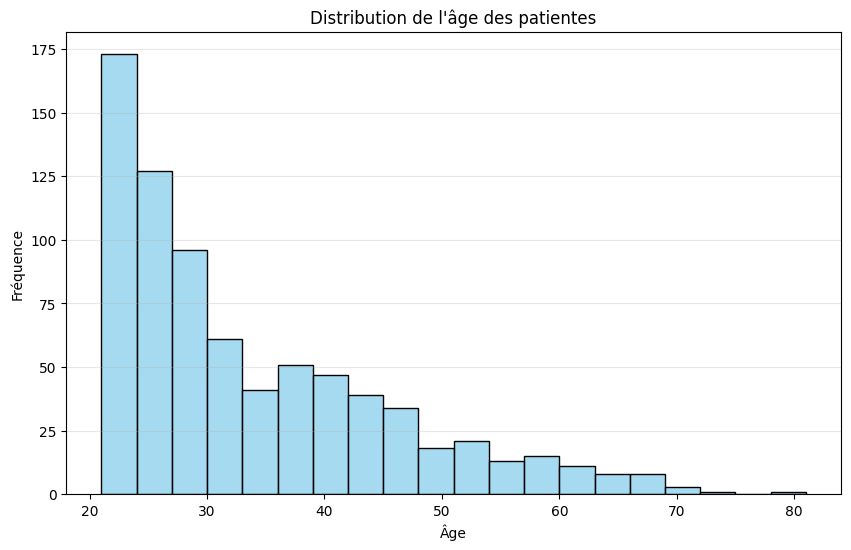

In [69]:
# Visualiser la distribution de l'age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, color='skyblue')
plt.title('Distribution de l\'âge des patientes')
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.grid(axis='y', alpha=0.3)
plt.show()

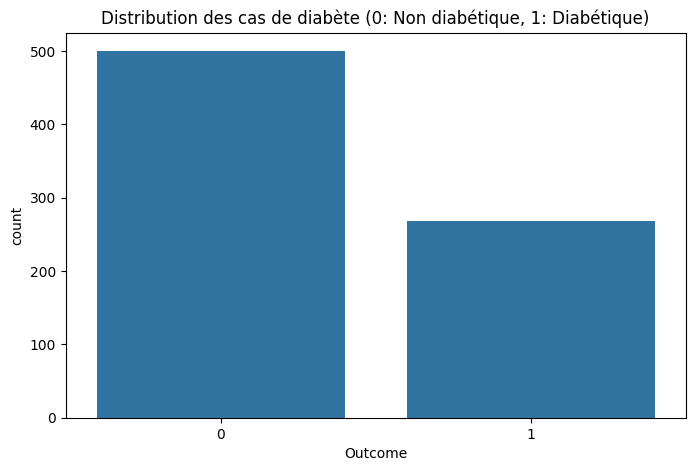

In [33]:
# Visualiser la distribution des cas de diabète
plt.figure(figsize=(8,5))
sns.countplot(x='Outcome', data=df)
plt.title('Distribution des cas de diabète (0: Non diabétique, 1: Diabétique)')
plt.show()

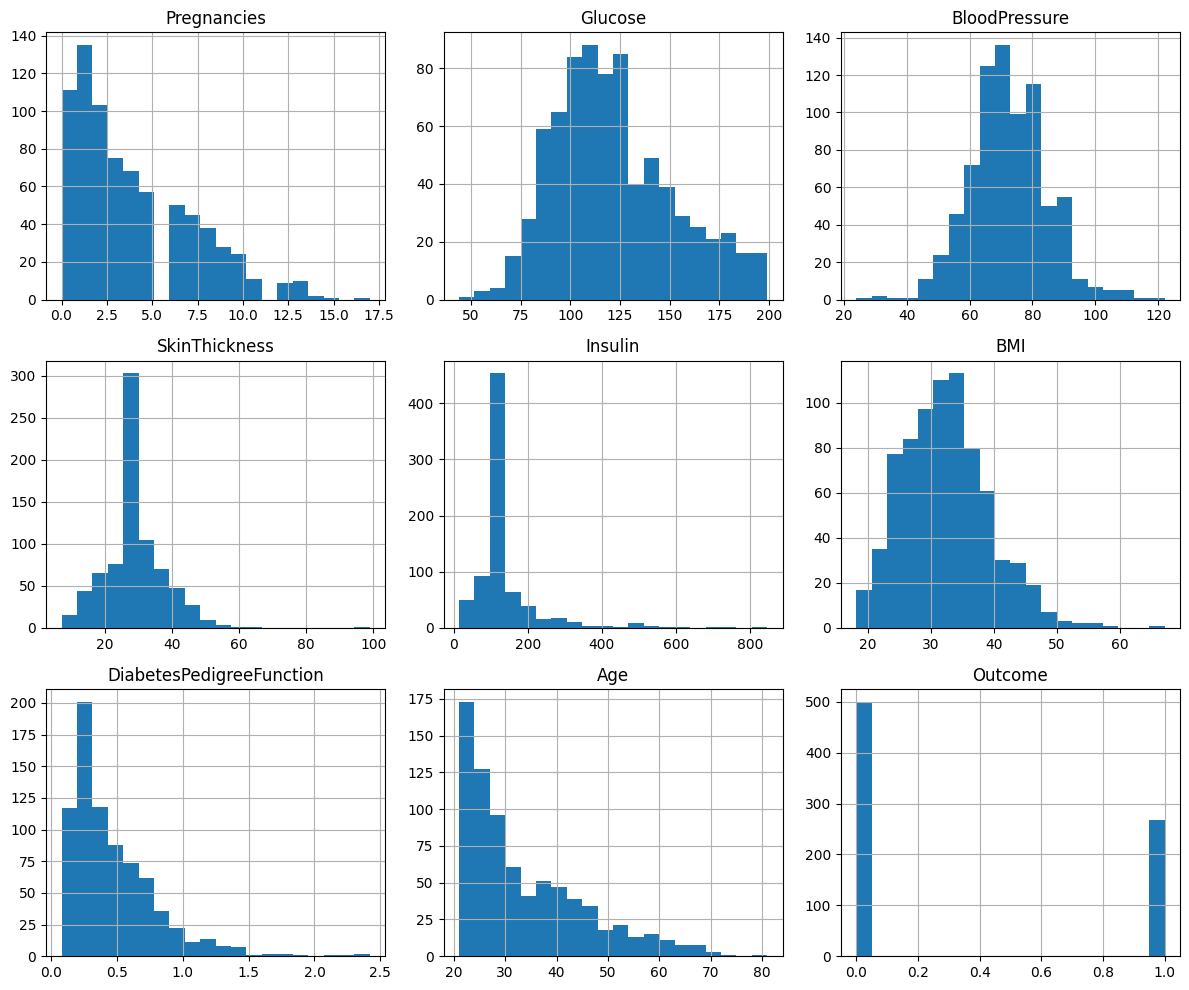

In [34]:
# Histogrammes des caractéristiques
df.hist(figsize=(12,10), bins=20)
plt.tight_layout()
plt.show()

- Analyse multivariée

Relation entre chaque variable et la cible

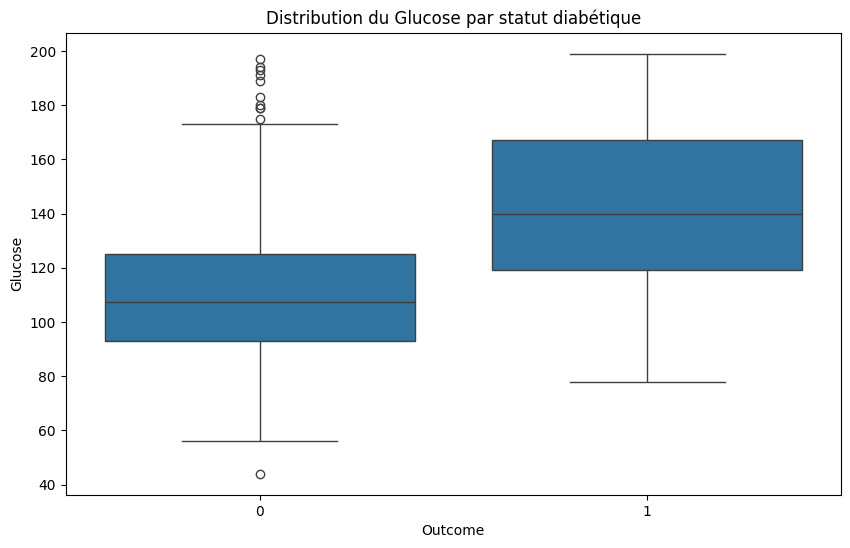

In [71]:

# Relation entre glucose et diabéte
plt.figure(figsize=(10,6))
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title('Distribution du Glucose par statut diabétique')
plt.show()



Intérpretation:

Les niveaux de glucose sont significativement plus élevés chez les diabétiques.



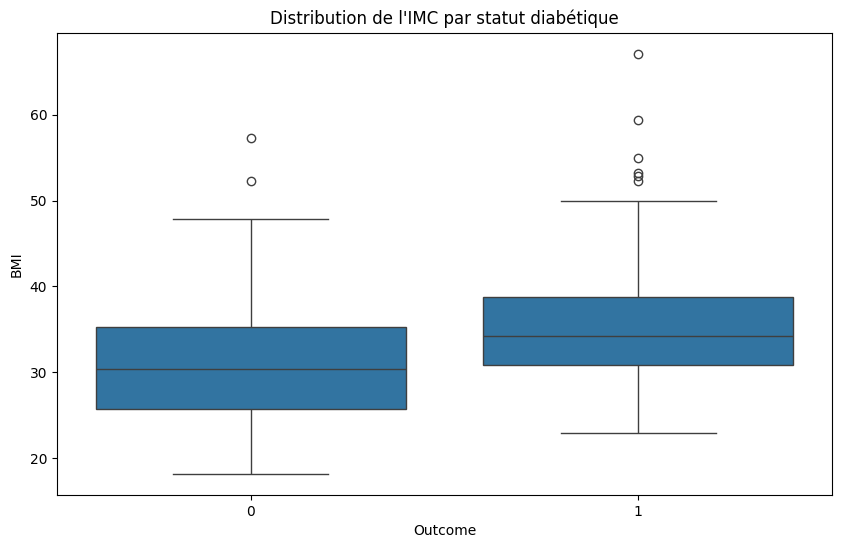

In [73]:
# Relation entre BMI et diabéte

plt.figure(figsize=(10,6))
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.title('Distribution de l\'IMC par statut diabétique')
plt.show()

Interprétation :

L'IMC est plus élevé chez les diabétiques

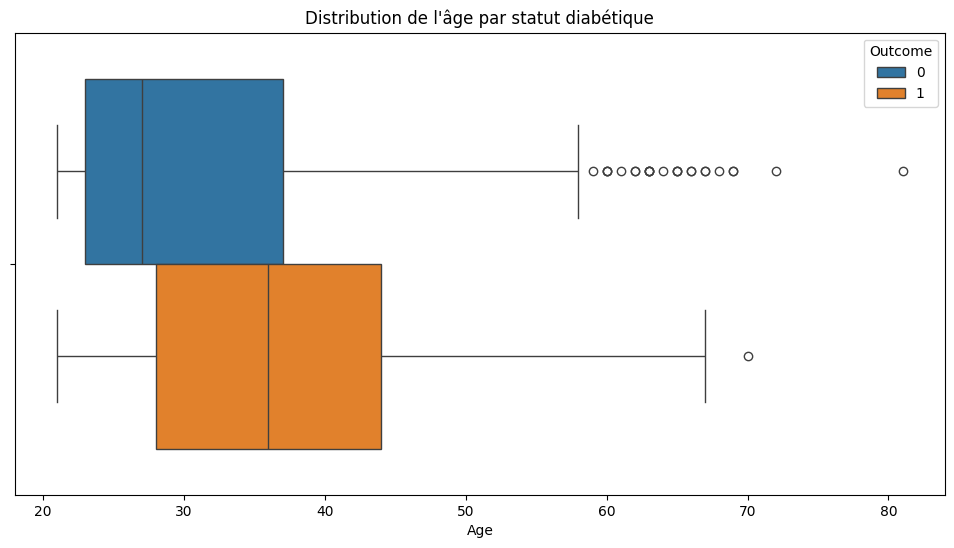

In [84]:
# Etudier la relation entre Age et le diabéte
plt.figure(figsize=(12,6))
sns.boxplot(x='Age', hue='Outcome', data=df)
plt.title("Distribution de l'âge par statut diabétique")
plt.show()


Intérpretation :

Plus l'âge est élevé, plus la probabilité de développer un diabète est grande.

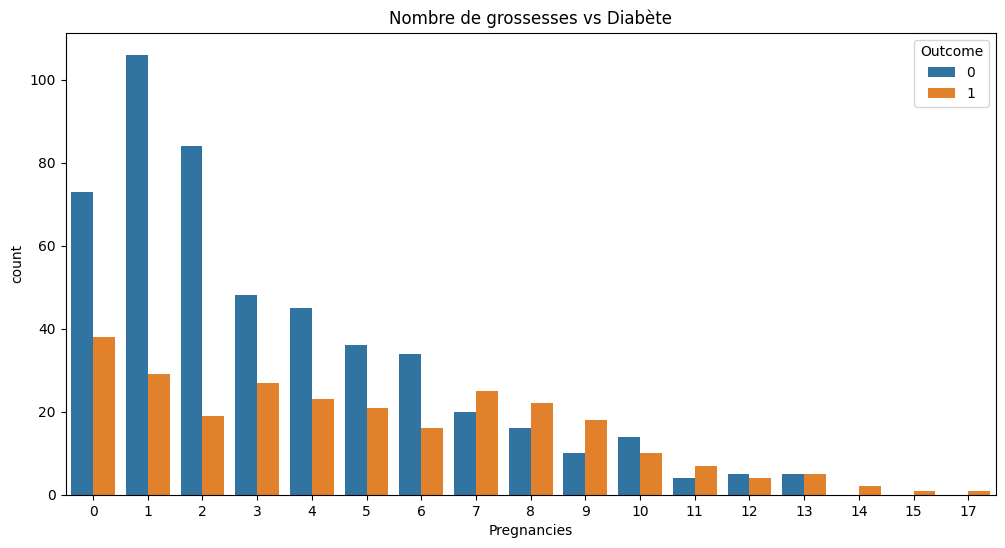

In [90]:
# Etudier la relation entre le diabéte et la grossesse
plt.figure(figsize=(12,6))
sns.countplot(x='Pregnancies', hue='Outcome', data=df)
plt.title('Nombre de grossesses vs Diabète')
plt.show()


interprétation:

Il semble y avoir une tendance où les femmes ayant plus de grossesses ont une proportion plus élevée de diabète.

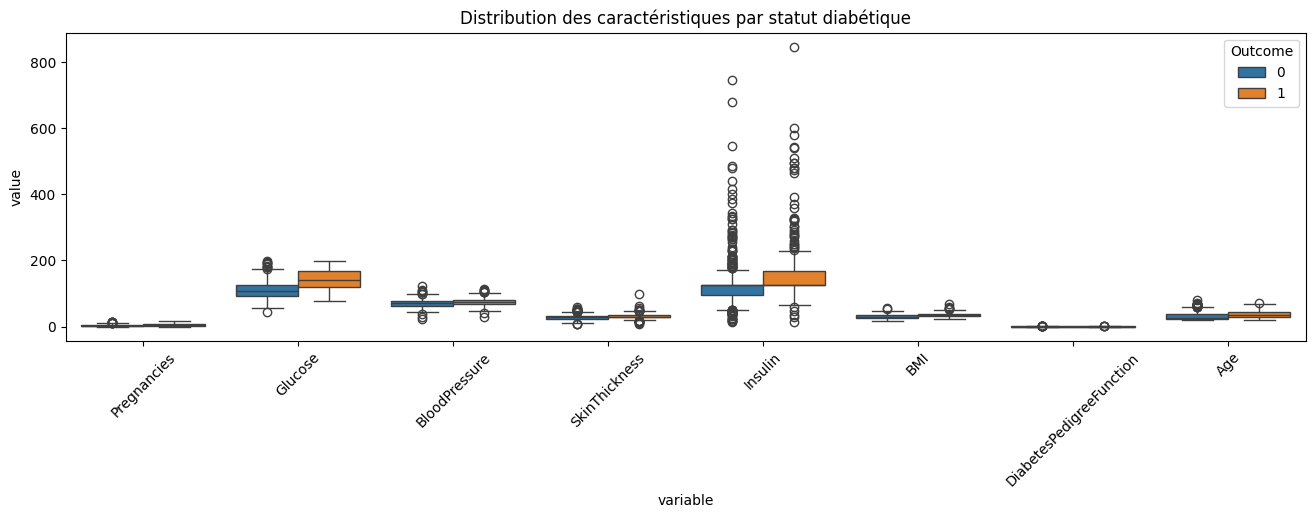

In [91]:
# Visualiser la distribution des caractéristiques par statut diabétique avec des Boxplots
plt.figure(figsize=(16,4))
df_melted = pd.melt(df, id_vars=['Outcome'], value_vars=df.columns[:-1])
sns.boxplot(x='variable', y='value', hue='Outcome', data=df_melted)
plt.xticks(rotation=45)
plt.title('Distribution des caractéristiques par statut diabétique')
plt.show()

Insights :


Le glucose est la variable la plus discriminante entre diabétiques et non-diabétiques.

Le nombre de grossesses, l’IMC et l’âge sont aussi des facteurs influents.

L’insuline présente des valeurs très dispersées, ce qui pourrait nécessiter une exploration plus approfondie.

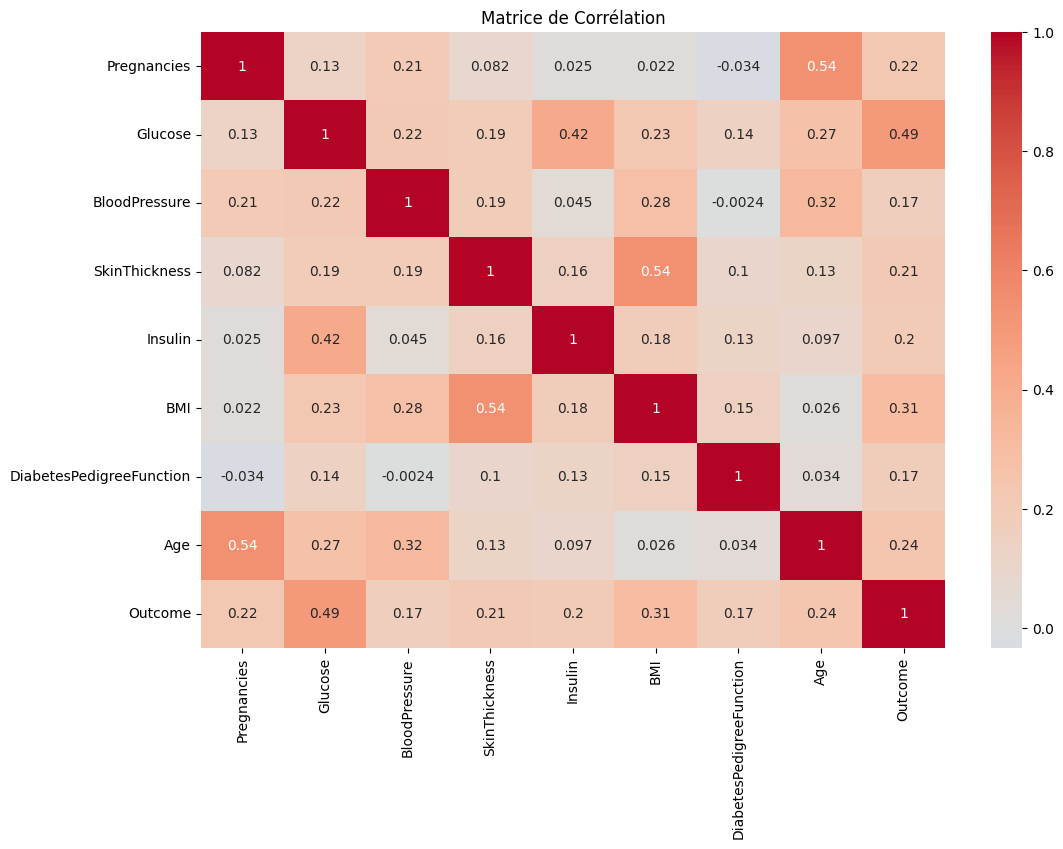

In [97]:
# Matrice de corrélation

plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de Corrélation')
plt.show()

Corrélations clés :

Glucose-Diabetes : 0.49 (la plus forte)

Age-Pregnancies : 0.54 (les femmes plus âgées ont eu plus de grossesses)

BMI-SkinThickness : 0.54 (cohérent avec l'adiposité)

# Préparation des Données pour la Modélisation

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Séparation features/target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Diviser les données en ensembles d'entraînement (80%) et de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print(f"Taille de l'ensemble d'entraînement: {X_train.shape}")
print(f"Taille de l'ensemble de test: {X_test.shape}")

Taille de l'ensemble d'entraînement: (537, 8)
Taille de l'ensemble de test: (231, 8)


# Modélisation - Régression Logistique

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Initialisation et entraînement du modèle
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)




LogisticRegression(max_iter=1000)

In [49]:
# Prédictions
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

In [55]:
# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Afficher les résultats
print(f"Exactitude du modèle : {accuracy:.2%}\n")
print("Matrice de Confusion:")
print(confusion_matrix(y_test, y_pred))
print("\nRapport de Classification:")
print(classification_report(y_test, y_pred))
print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba):.2f}")

Exactitude du modèle : 74.03%

Matrice de Confusion:
[[124  27]
 [ 33  47]]

Rapport de Classification:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       151
           1       0.64      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231


Accuracy: 0.74
AUC-ROC: 0.80


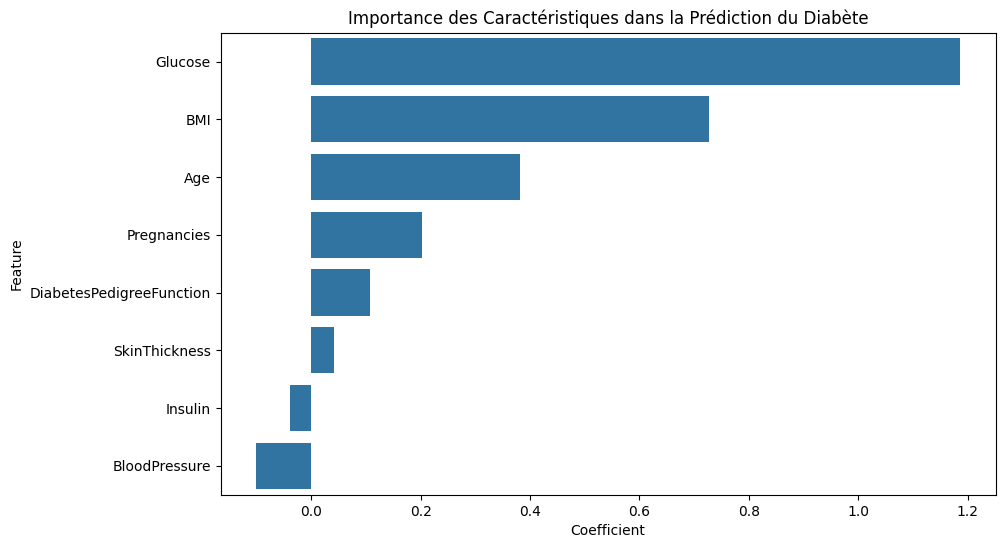

In [63]:
# Evaluer l'importance des caractéristiques dans notre analyse
coeff_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': logreg.coef_[0]})
coeff_df = coeff_df.sort_values('Coefficient', ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df)
plt.title('Importance des Caractéristiques dans la Prédiction du Diabète')
plt.show()

# Modélisation - Random Forest texte en italique(pour comparaison)

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Standardisation des données (mise à l'échelle)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Création et entraînement du modèle Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Prédiction sur l'ensemble de test
y_pred = rf_model.predict(X_test_scaled)

# Évaluer le du modèle
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Affichage des résultats
print(f"Exactitude du modèle : {accuracy:.2%}\n")
print("Matrice de confusion :")
print(confusion)
print("\nRapport de classification :")
print(report)


Exactitude du modèle : 75.32%

Matrice de confusion :
[[120  31]
 [ 26  54]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       151
           1       0.64      0.68      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.75      0.75       231



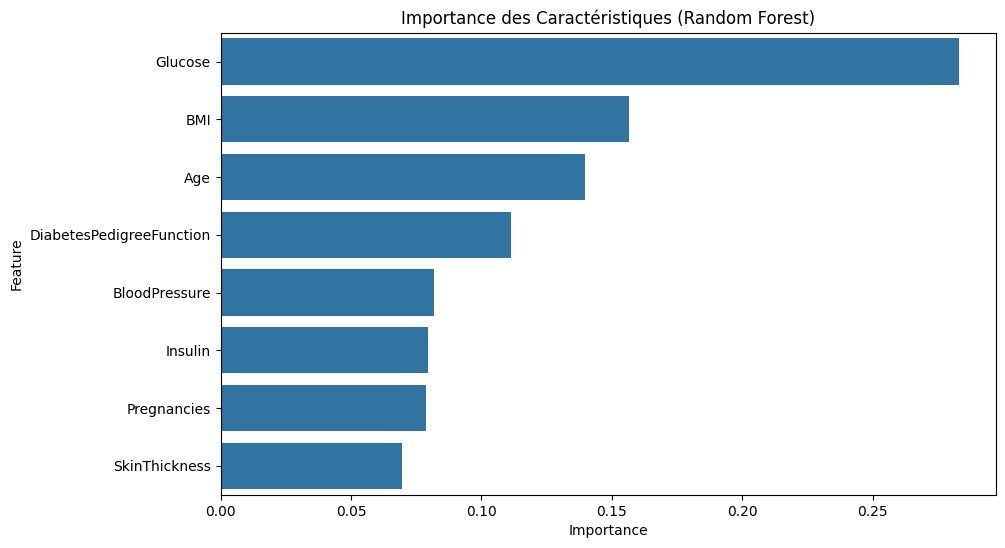

In [92]:
# Evaluer l'importance des caractéristiques dans notre analyse
futur_imp = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
futur_imp = futur_imp.sort_values('Importance', ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=futur_imp)
plt.title('Importance des Caractéristiques (Random Forest)')
plt.show()

Interprétations:

D'après les deux modéles les variables les plus prédictives sont :

- Glucose (niveau de glucose)

- BMI (Indice de Masse Corporelle)

- Age

- DiabetesPedigreeFunction (prédisposition génétique)



**Confirmation l'hypothèse :**

- Glucose et BMI sont bien parmi les facteurs les plus importants

- L'âge est également significatif

- Le nombre de grossesses (Pregnancies) est moins important que prévu